Para lidar com que lingua, caso use um maior com mais datas

https://www.kaggle.com/leticehs/nlp1-part1-dataset-cut

In [1]:
!pip install vaderSentiment

     |████████████████████████████████| 125 kB 8.2 MB/s 


In [2]:
!pip install spacy
!spacy download en

     |████████████████████████████████| 12.0 MB 7.5 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [3]:
#imports 
#Tirando os warnings
import warnings
warnings.filterwarnings("ignore")
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import math
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, log_loss
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, KFold
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from scipy.stats import zscore
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler
from imblearn.under_sampling import TomekLinks
from sklearn.metrics import balanced_accuracy_score

In [4]:
import spacy
import nltk



In [5]:
# controla tamanho geral das figuras no matplotlib/seaborn
TAMANHO_GERAL = [15, 10]
plt.rcParams['figure.figsize'] = TAMANHO_GERAL
sns.set(rc={'figure.figsize' : TAMANHO_GERAL})

In [6]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('rslp')
spacy_nlp = spacy.load('en')
lst_stopwords = nltk.corpus.stopwords.words("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


In [7]:
'''
Preprocess a string.
:parameter
    :param text: string - name of column containing text
    :param lst_stopwords: list - list of stopwords to remove
    :param flg_stemm: bool - whether stemming is to be applied
    :param flg_lemm: bool - whether lemmitisation is to be applied
:return
    cleaned text
'''
def lemmatize_spacy(text):
  doc = spacy_nlp(text)
  lemmatize_words = []
  lemmatize_words += [token.lemma_ for token in doc]
  return lemmatize_words

def remove_stopwords(lst_text):
  if lst_stopwords is not None:
        lst_text = [word for word in lst_text if word not in 
                    lst_stopwords]
  return lst_text

def utils_preprocess_text(text, flg_stemm=False, flg_lemm=True, lst_stopwords=None):
    ## clean (convert to lowercase and remove punctuations and   characters and then strip)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
            
    ## Tokenize (convert from string to list)
    lst_text = text.split()
    ## remove Stopwords
    if lst_stopwords is not None:
        lst_text = [word for word in lst_text if word not in 
                    lst_stopwords]
                
    ## Stemming (remove -ing, -ly, ...)
    if flg_stemm == True:
        ps = nltk.stem.RSLPStemmer()
        lst_text = [ps.stem(word) for word in lst_text]
                
    ## Lemmatisation (convert the word into root word)
    if flg_lemm == True:
      #print(lst_text)
      lst_text =  lemmatize_spacy(" ".join(lst_text))
          
    ## back to string from list
    text = " ".join(lst_text)
    return text

In [8]:

# import SentimentIntensityAnalyzer class
# from vaderSentiment.vaderSentiment module.
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
 
# function to print sentiments
# of the sentence.
def sentiment_scores(sentence):
 
    # Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()
 
    # polarity_scores method of SentimentIntensityAnalyzer
    # object gives a sentiment dictionary.
    # which contains pos, neg, neu, and compound scores.
    sentiment_dict = sid_obj.polarity_scores(sentence)
     
 
    # decide sentiment as positive, negative and neutral
    if sentiment_dict['compound'] >= 0.05 :
        return "Positive"
 
    elif sentiment_dict['compound'] <= - 0.05 :
         return  "Negative"
 
    else :
         return "Neutral"

**Resumo diário dos preço**

In [ ]:
# https://www.kaggle.com/mczielinski/bitcoin-historical-data
dfPrice = pd.read_csv('Data/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv')
dfPrice

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
4857372,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


In [ ]:
dfPrice = dfPrice.dropna(how="all",subset=dfPrice.columns[1:])
dfPrice['Timestamp'] = pd.to_datetime(dfPrice['Timestamp'], unit='s')
# set index timestamp column
dfPrice = dfPrice.set_index("Timestamp")
#Avaliando só em um mês
#three month
#data inicial
dataIni='2016-01-01'
#data final
dataFim='2019-03-29'
dfPrice["Date"] = dfPrice.index.date
dfPrice = dfPrice[dataIni : dataFim] 
dfMaxMin_perDay  = pd.concat([dfPrice.groupby("Date").max().add_suffix('_max'), dfPrice.groupby("Date").min().add_suffix('_min')], axis=1)
dfMaxMin_perDay 

,Open_max,High_max,Low_max,Close_max,Volume_(BTC)_max,Volume_(Currency)_max,Weighted_Price_max,Open_min,High_min,Low_min,Close_min,Volume_(BTC)_min,Volume_(Currency)_min,Weighted_Price_min
Date,,,,,,,,,,,,,,
2016-01-01,436.00,436.00,436.00,436.00,190.517583,8.287514e+04,436.000000,427.66,427.66,427.20,427.28,0.005424,2.351308,427.660000
2016-01-02,435.99,435.99,435.99,435.99,151.286879,6.580372e+04,435.990000,430.60,430.70,430.42,430.50,0.011481,5.000000,430.601860
2016-01-03,433.89,434.09,433.89,433.96,165.870201,7.084861e+04,433.890000,424.15,424.15,424.06,424.06,0.011411,4.878782,424.126493
2016-01-04,435.49,435.86,435.49,435.86,574.487586,2.495248e+05,435.490000,428.46,428.50,428.44,428.47,0.011300,4.884990,428.463216
2016-01-05,435.37,435.39,435.37,435.39,202.789091,8.752876e+04,435.370000,429.53,429.58,429.50,429.52,0.000349,0.151903,429.513580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-03-25,3978.19,3980.22,3978.19,3978.19,357.918590,1.397080e+06,3978.190000,3864.27,3865.79,3850.45,3859.54,0.001371,5.449384,3860.201628
2019-03-26,3923.17,3936.36,3922.14,3923.12,196.431773,7.708970e+05,3924.502706,3880.90,3882.37,3879.50,3881.02,0.002287,8.948421,3881.022764
2019-03-27,4035.00,4037.11,4034.16,4034.44,362.545463,1.456930e+06,4034.987861,3912.98,3912.98,3912.19,3912.97,0.001500,5.955435,3912.976869


In [ ]:
dfMaxMin_perDay["variacao"] = ((dfMaxMin_perDay['Close_max'] - dfMaxMin_perDay['Open_min'])*100/ dfMaxMin_perDay['Open_min']).values
dfMaxMin_perDay 

,Open_max,High_max,Low_max,Close_max,Volume_(BTC)_max,Volume_(Currency)_max,Weighted_Price_max,Open_min,High_min,Low_min,Close_min,Volume_(BTC)_min,Volume_(Currency)_min,Weighted_Price_min,variacao
Date,,,,,,,,,,,,,,,
2016-01-01,436.00,436.00,436.00,436.00,190.517583,8.287514e+04,436.000000,427.66,427.66,427.20,427.28,0.005424,2.351308,427.660000,1.950147
2016-01-02,435.99,435.99,435.99,435.99,151.286879,6.580372e+04,435.990000,430.60,430.70,430.42,430.50,0.011481,5.000000,430.601860,1.251742
2016-01-03,433.89,434.09,433.89,433.96,165.870201,7.084861e+04,433.890000,424.15,424.15,424.06,424.06,0.011411,4.878782,424.126493,2.312861
2016-01-04,435.49,435.86,435.49,435.86,574.487586,2.495248e+05,435.490000,428.46,428.50,428.44,428.47,0.011300,4.884990,428.463216,1.727116
2016-01-05,435.37,435.39,435.37,435.39,202.789091,8.752876e+04,435.370000,429.53,429.58,429.50,429.52,0.000349,0.151903,429.513580,1.364282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-03-25,3978.19,3980.22,3978.19,3978.19,357.918590,1.397080e+06,3978.190000,3864.27,3865.79,3850.45,3859.54,0.001371,5.449384,3860.201628,2.948034
2019-03-26,3923.17,3936.36,3922.14,3923.12,196.431773,7.708970e+05,3924.502706,3880.90,3882.37,3879.50,3881.02,0.002287,8.948421,3881.022764,1.087892
2019-03-27,4035.00,4037.11,4034.16,4034.44,362.545463,1.456930e+06,4034.987861,3912.98,3912.98,3912.19,3912.97,0.001500,5.955435,3912.976869,3.104028


In [ ]:
dfMaxMin_perDay["variacao_openclose_max"] = ((dfMaxMin_perDay['Close_max'] - dfMaxMin_perDay['Open_max'])*100/ dfMaxMin_perDay['Open_max']).values
dfMaxMin_perDay["variacao_openclose_min"] = ((dfMaxMin_perDay['Close_min'] - dfMaxMin_perDay['Open_min'])*100/ dfMaxMin_perDay['Open_min']).values

dfMaxMin_perDay 

,Open_max,High_max,Low_max,Close_max,Volume_(BTC)_max,Volume_(Currency)_max,Weighted_Price_max,Open_min,High_min,Low_min,Close_min,Volume_(BTC)_min,Volume_(Currency)_min,Weighted_Price_min,variacao,variacao_openclose_max,variacao_openclose_min
Date,,,,,,,,,,,,,,,,,
2016-01-01,436.00,436.00,436.00,436.00,190.517583,8.287514e+04,436.000000,427.66,427.66,427.20,427.28,0.005424,2.351308,427.660000,1.950147,0.000000,-0.088856
2016-01-02,435.99,435.99,435.99,435.99,151.286879,6.580372e+04,435.990000,430.60,430.70,430.42,430.50,0.011481,5.000000,430.601860,1.251742,0.000000,-0.023223
2016-01-03,433.89,434.09,433.89,433.96,165.870201,7.084861e+04,433.890000,424.15,424.15,424.06,424.06,0.011411,4.878782,424.126493,2.312861,0.016133,-0.021219
2016-01-04,435.49,435.86,435.49,435.86,574.487586,2.495248e+05,435.490000,428.46,428.50,428.44,428.47,0.011300,4.884990,428.463216,1.727116,0.084962,0.002334
2016-01-05,435.37,435.39,435.37,435.39,202.789091,8.752876e+04,435.370000,429.53,429.58,429.50,429.52,0.000349,0.151903,429.513580,1.364282,0.004594,-0.002328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-03-25,3978.19,3980.22,3978.19,3978.19,357.918590,1.397080e+06,3978.190000,3864.27,3865.79,3850.45,3859.54,0.001371,5.449384,3860.201628,2.948034,0.000000,-0.122403
2019-03-26,3923.17,3936.36,3922.14,3923.12,196.431773,7.708970e+05,3924.502706,3880.90,3882.37,3879.50,3881.02,0.002287,8.948421,3881.022764,1.087892,-0.001274,0.003092
2019-03-27,4035.00,4037.11,4034.16,4034.44,362.545463,1.456930e+06,4034.987861,3912.98,3912.98,3912.19,3912.97,0.001500,5.955435,3912.976869,3.104028,-0.013879,-0.000256


<AxesSubplot:xlabel='Date', ylabel='Close_max'>

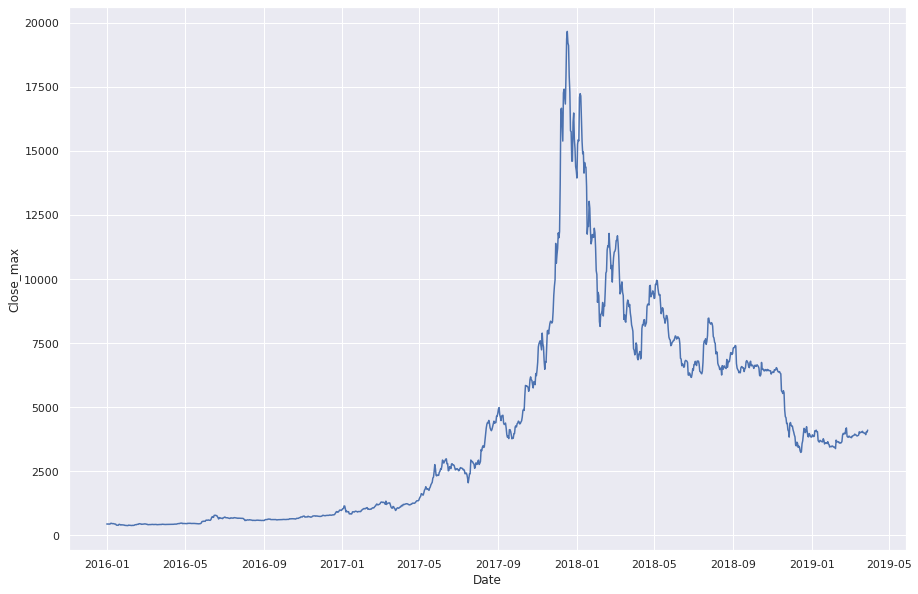

In [ ]:
sns.lineplot(data = dfMaxMin_perDay, x = "Date", y = "Close_max")

<AxesSubplot:xlabel='Volume_(BTC)_max', ylabel='Volume_(Currency)_max'>

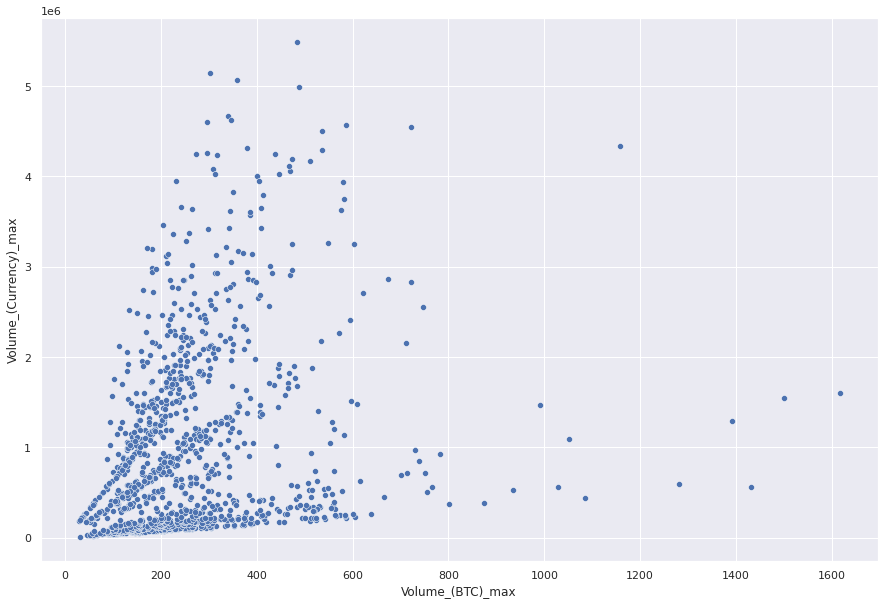

In [ ]:
# é interessante notar que além do comportamento óbvio (o volume de bitcoins negociados se traduzindo de maneira relativamente linear com o volume de dinheiro negociado),
# temos "4/5 faixas principais", podemos confirmar a existência dessa tendência de agrupamento por meio de histogramas / KMeans para pegar o coeficiente angular dessas retas
sns.scatterplot(x=dfMaxMin_perDay["Volume_(BTC)_max"], y=dfMaxMin_perDay["Volume_(Currency)_max"])

In [ ]:
tmp = (dfMaxMin_perDay["Volume_(Currency)_max"] / dfMaxMin_perDay["Volume_(BTC)_max"])

(array([326., 110.,  52.,  16.,  10.,  37.,  31.,  11.,  57.,  82.,  35.,
         13.,   1.,   6.,  14.,  39.,  87.,  32.,  24.,  24.,  22.,  28.,
         18.,  12.,   9.,  11.,   3.,   8.,   8.,   9.,   4.,   2.,   2.,
          1.,   6.,   5.,   1.,   5.,   3.,   3.,   2.,   2.,   2.,   2.,
          3.,   2.,   1.,   0.,   0.,   3.]),
 array([  365.80325918,   737.19468589,  1108.58611259,  1479.9775393 ,
         1851.368966  ,  2222.7603927 ,  2594.15181941,  2965.54324611,
         3336.93467282,  3708.32609952,  4079.71752623,  4451.10895293,
         4822.50037964,  5193.89180634,  5565.28323305,  5936.67465975,
         6308.06608646,  6679.45751316,  7050.84893987,  7422.24036657,
         7793.63179328,  8165.02321998,  8536.41464669,  8907.80607339,
         9279.1975001 ,  9650.5889268 , 10021.98035351, 10393.37178021,
        10764.76320692, 11136.15463362, 11507.54606033, 11878.93748703,
        12250.32891374, 12621.72034044, 12993.11176715, 13364.50319385,
        13

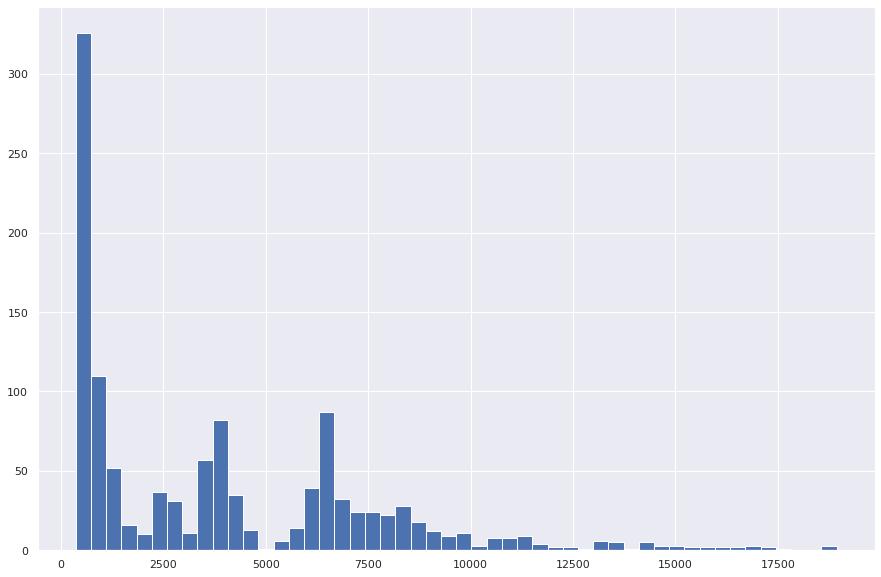

In [ ]:
# podemos ver pelo histograma abaixo que temos algumas faixas mais comuns que outras, por exemplo o valor de coeficiente angular = 2 praticamente não existe, mas existe com 1.5 e com 2.4
# isso são as faixas que podem ser vistas acima
plt.hist(tmp, bins=50)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
km = KMeans(n_clusters=5, init = np.array([700, 2500, 400, 6500, 10000]).reshape(5, 1))

In [ ]:
km.fit(tmp.to_numpy().reshape(-1, 1))

KMeans(init=array([[  700],
       [ 2500],
       [  400],
       [ 6500],
       [10000]]),
       n_clusters=5)

In [ ]:
# esses podem ser considerados os coeficientes angulares das 4 retas dos dados acima
km.cluster_centers_.ravel()

array([ 2408.19199247,  3957.24643649,   700.53089962,  7339.80950887,
       13403.86501188])

In [ ]:
predictions = km.predict(tmp.to_numpy().reshape(-1, 1))

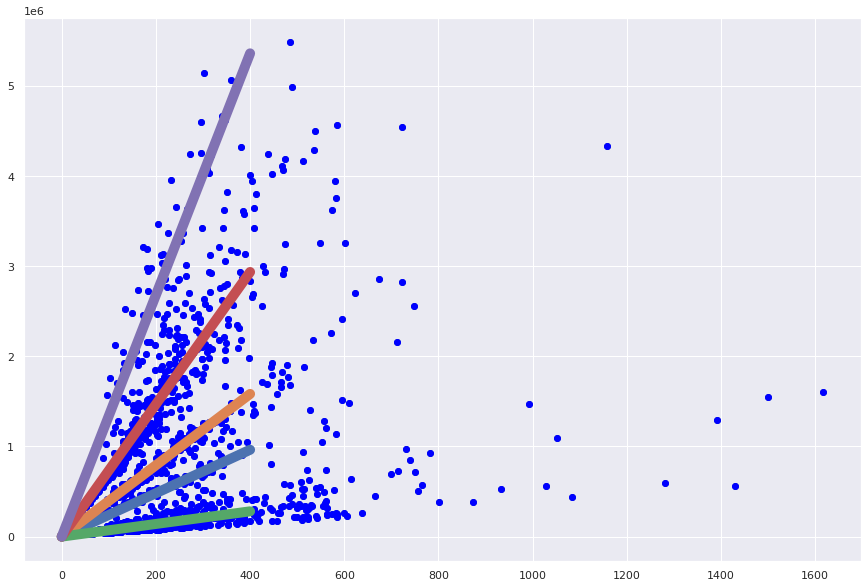

In [ ]:
plt.scatter(dfMaxMin_perDay["Volume_(BTC)_max"], dfMaxMin_perDay["Volume_(Currency)_max"])
tv = np.linspace(0, 400, int(1e4))
for m in km.cluster_centers_.ravel():
    plt.plot(tv, [m * ti for ti in tv], linewidth=10)
plt.scatter(dfMaxMin_perDay["Volume_(BTC)_max"], dfMaxMin_perDay["Volume_(Currency)_max"], color = "blue")

In [ ]:
dfMaxMin_perDay["grupo_currencyvolume"] = predictions

<AxesSubplot:xlabel='Date', ylabel='Close_max'>

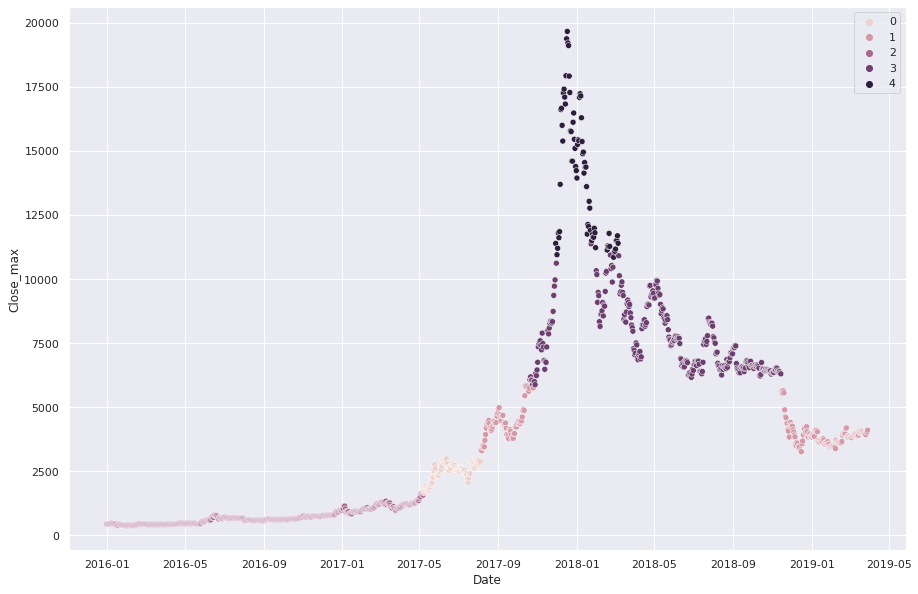

In [ ]:
# o bitcoin tem "patamares" de preço, o coeficiente angular do gráfico acima é basicamente o preço do bitcoin (com algumas exceções!, ver que gráfico abaixo em que alguns dias tem vizinhos de cores diferentes),
# isso mostra que o preço não é exatamente uniformemente distribuido
# a moeda passa um tempo com um certo patamar e depois muda para outro rapidamente, essas variações são abruptas, de forma que alguns coeficientes angulares no gráfico acima não apareçam
sns.scatterplot(x=dfMaxMin_perDay.index, y=dfMaxMin_perDay["Close_max"], hue = predictions)

<AxesSubplot:xlabel='Volume_(BTC)_max', ylabel='variacao'>

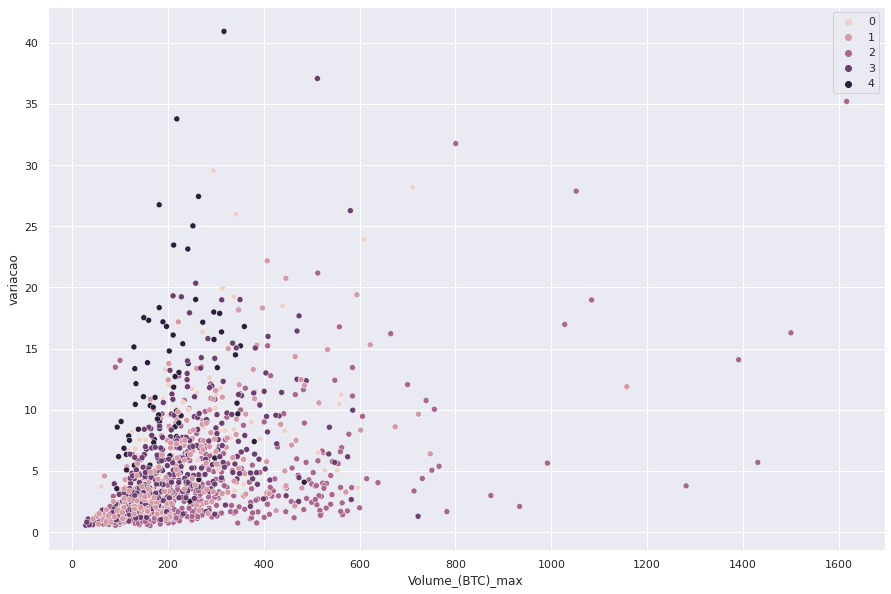

In [ ]:
# podemos tentar usar essas categorias de patameres para ver alguma tendência/correlação
# volume x variacao
sns.scatterplot(x=dfMaxMin_perDay["Volume_(BTC)_max"], y=dfMaxMin_perDay["variacao"], hue = predictions)

<AxesSubplot:xlabel='Volume_(BTC)_max', ylabel='Close_max'>

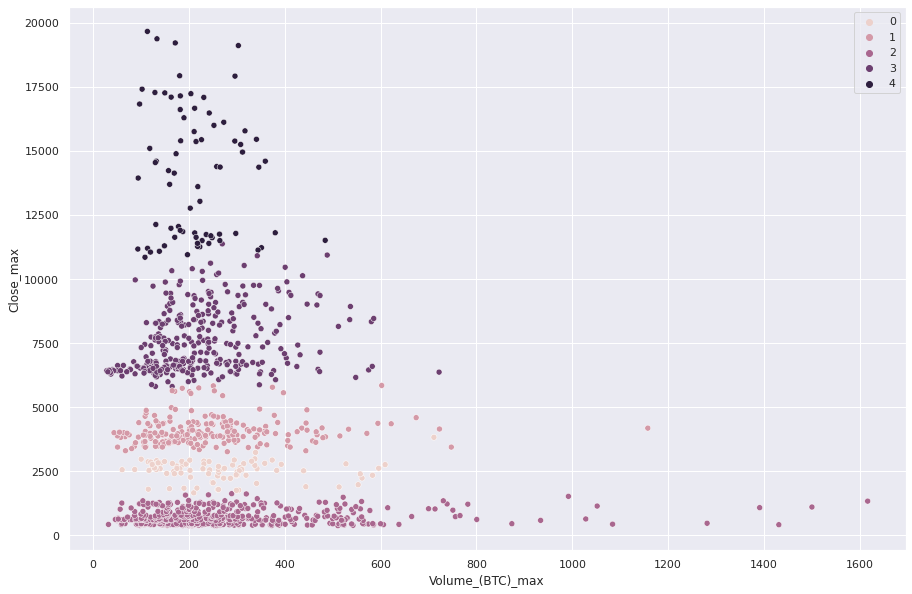

In [ ]:
# claro que o valor de close_max vai estar fortemente correlacionado, ainda assim esses grupos que achamos indicam tendências, vemos que a dispersão de cada uma
# parece manter pouca dependência com outros grupos, de qualquer forma esses grupos parecem ser relevantes para correlações e análise do comportamento do bitcoin
sns.scatterplot(x=dfMaxMin_perDay["Volume_(BTC)_max"], y=dfMaxMin_perDay["Close_max"], hue = predictions)

<AxesSubplot:xlabel='Volume_(BTC)_max', ylabel='variacao_openclose_max'>

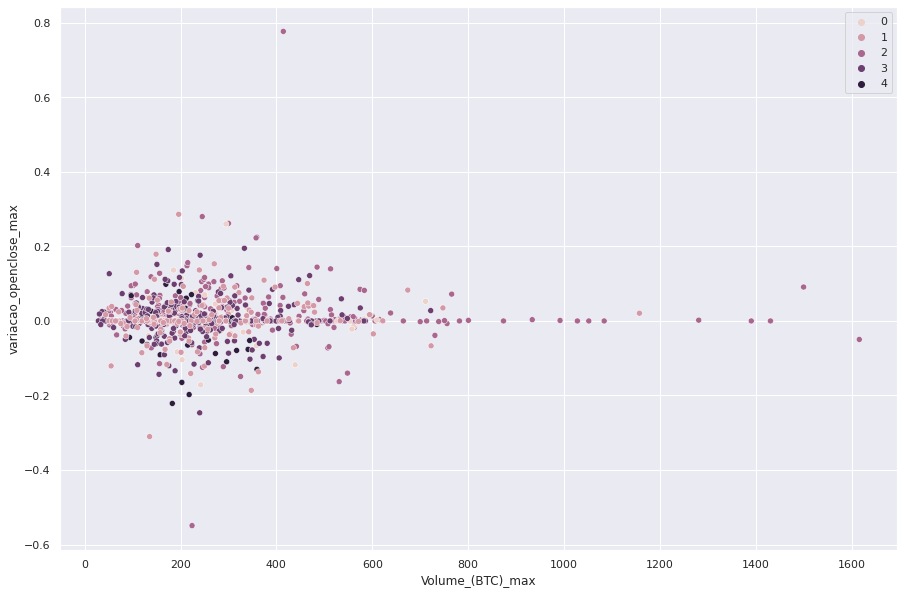

In [ ]:
sns.scatterplot(x=dfMaxMin_perDay["Volume_(BTC)_max"], y=dfMaxMin_perDay["variacao_openclose_max"], hue = predictions)

<AxesSubplot:xlabel='Date', ylabel='variacao_openclose_max'>

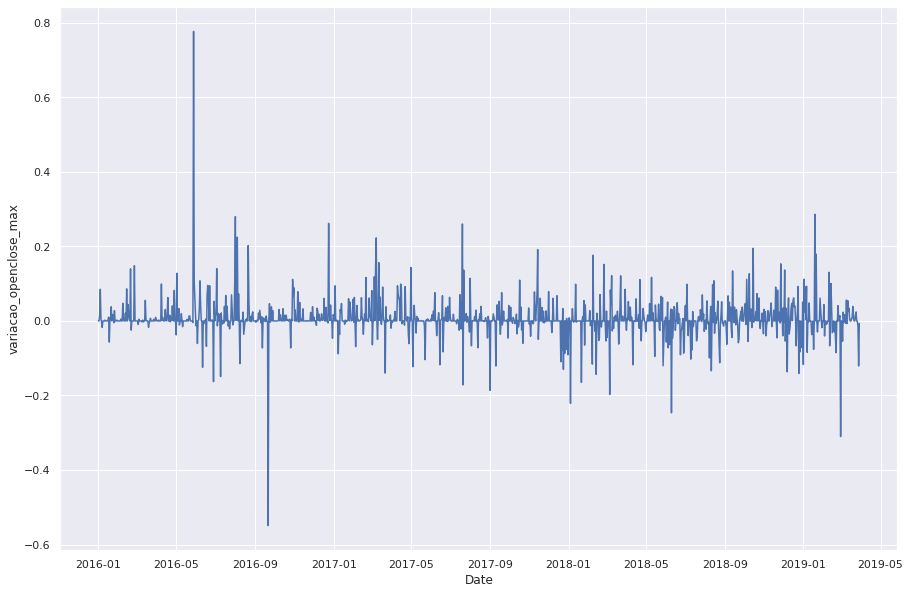

In [ ]:
# há alguns picos interessantes (que estão fora da data combinada 2018-03 <-> 2019-03)
sns.lineplot(data = dfMaxMin_perDay, x = "Date", y = "variacao_openclose_max")

<AxesSubplot:xlabel='Date', ylabel='variacao_openclose_min'>

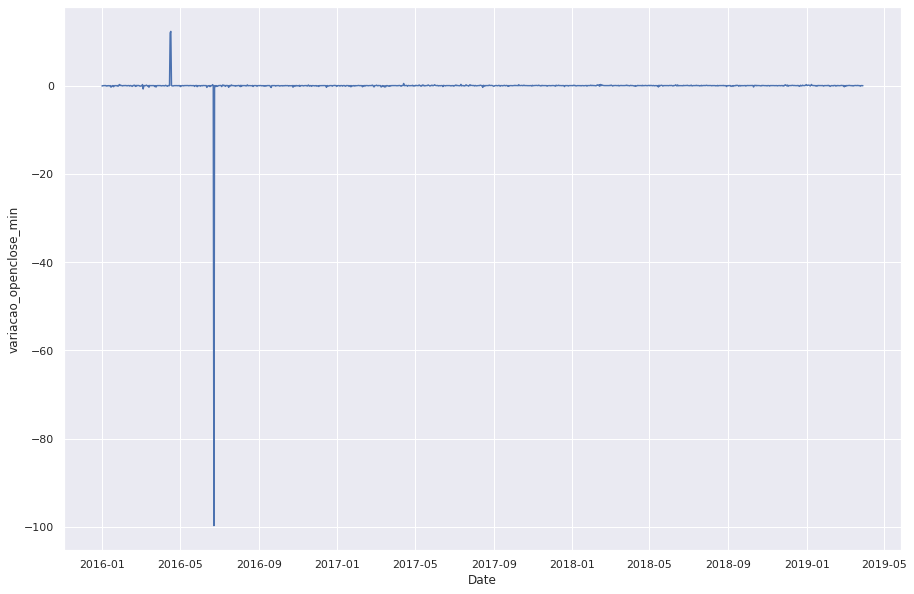

In [ ]:
sns.lineplot(data = dfMaxMin_perDay, x = "Date", y = "variacao_openclose_min")

In [ ]:
# alguns dias possuem variações atípicas de valor de abertura/fechamento max/min
dfMaxMin_perDay[abs(dfMaxMin_perDay["variacao_openclose_max"]) > 0.5]

,Open_max,High_max,Low_max,Close_max,Volume_(BTC)_max,Volume_(Currency)_max,Weighted_Price_max,Open_min,High_min,Low_min,Close_min,Volume_(BTC)_min,Volume_(Currency)_min,Weighted_Price_min,variacao,variacao_openclose_max,variacao_openclose_min,grupo_currencyvolume
Date,,,,,,,,,,,,,,,,,,
2016-05-28,525.00,529.08,524.35,529.08,414.439940,206138.17669,527.727739,469.11,470.25,468.0,468.0,0.010047,4.989999,468.282651,12.783782,0.777143,-0.236618,2
2016-09-21,600.85,601.01,597.10,597.55,224.049297,133122.00966,599.938813,592.10,592.90,592.1,592.1,0.008383,4.999998,592.773985,0.920453,-0.549222,0.000000,2


In [ ]:
dfMaxMin_perDay[abs(dfMaxMin_perDay["variacao_openclose_min"]) > 0.5]

,Open_max,High_max,Low_max,Close_max,Volume_(BTC)_max,Volume_(Currency)_max,Weighted_Price_max,Open_min,High_min,Low_min,Close_min,Volume_(BTC)_min,Volume_(Currency)_min,Weighted_Price_min,variacao,variacao_openclose_max,variacao_openclose_min,grupo_currencyvolume
Date,,,,,,,,,,,,,,,,,,
2016-03-05,408.95,408.98,408.95,408.95,1430.761155,558785.046910,408.950000,386.92,387.77,382.00,384.00,0.012215,4.922470,384.120903,5.693683,0.000000,-0.754678,2
2016-04-16,432.87,432.87,432.87,432.87,90.382887,38864.629637,432.870000,381.47,427.31,381.47,427.12,0.002712,1.164959,414.377203,13.474192,0.000000,11.966865,2
2016-04-17,430.84,430.91,430.84,430.91,100.174318,42645.678333,430.899002,377.87,424.30,377.87,424.30,0.012032,5.166494,424.300000,14.036573,0.016247,12.287295,2
2016-06-23,632.36,632.67,632.00,632.36,1027.959999,566265.104610,632.258641,540.61,547.58,1.50,1.50,0.007795,4.558803,532.309155,16.971569,0.000000,-99.722536,2


<AxesSubplot:xlabel='variacao_openclose_max', ylabel='Count'>

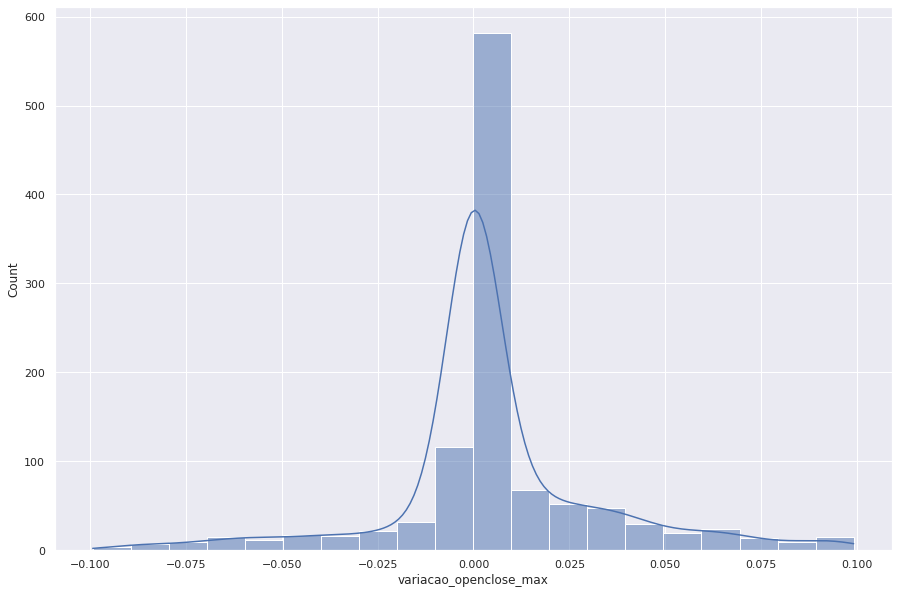

In [ ]:
# quando analisamos variacao_openclose_max temos um viés de variação positiva, com o mínimo um viés negativo
sns.histplot(x = dfMaxMin_perDay[abs(dfMaxMin_perDay["variacao_openclose_max"]) < 0.1]["variacao_openclose_max"], kde = True, bins=20)

<AxesSubplot:xlabel='variacao_openclose_min', ylabel='Count'>

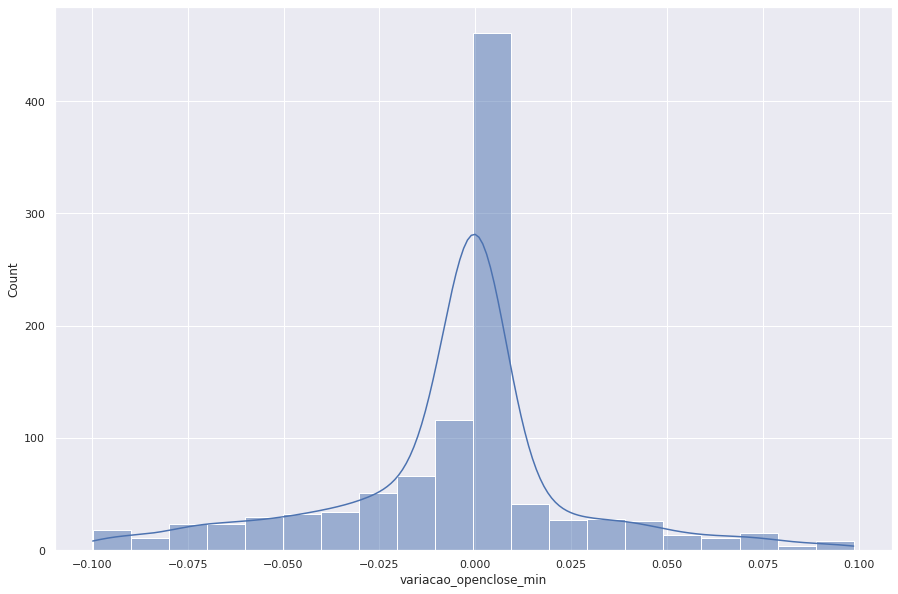

In [ ]:
sns.histplot(x = dfMaxMin_perDay[abs(dfMaxMin_perDay["variacao_openclose_min"]) < 0.1]["variacao_openclose_min"], kde = True, bins=20)

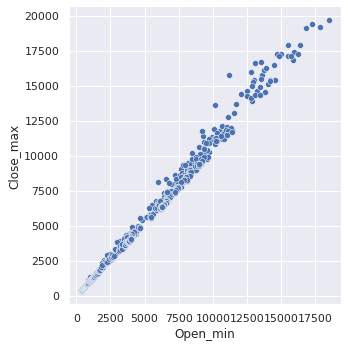

In [ ]:
## claramente open_min e close_max não podem ter uma variação muito grande, y \approx x
sns.relplot(x="Open_min", y="Close_max", data=dfMaxMin_perDay)

In [ ]:
sns.pairplot(dfMaxMin_perDay)

**Tweets Bitcoin**

In [9]:
# https://www.kaggle.com/alaix14/bitcoin-tweets-20160101-to-20190329
import random

p = 0.005

#Stopwords_Lemmatisation
#dfTweets = pd.read_csv('Data/tweets.csv',delimiter=';', skiprows=lambda i: i>0 and random.random() > p, lineterminator='\n' )
dfTweets = pd.read_csv("https://drive.google.com/uc?id=1-7sTof7wvgH2Cn62I7cwylo7FzNGCXp9",delimiter=',', lineterminator='\n')


In [10]:
dfTweets = dfTweets.rename(columns={"text\r": "text"})

In [11]:
#dfTweets = dfTweets.rename(columns={"text": "raw_text"})
dfTweets = dfTweets.drop(columns=['text'])
dfTweets = dfTweets.drop(columns=['language'])

In [12]:
dfTweets = dfTweets.rename(columns={"text_clean": "text"})


In [13]:
dfTweets = dfTweets.drop(columns=['Unnamed: 0'])

In [14]:
dfTweets.head()

,id,user,fullname,url,timestamp,replies,likes,retweets,text
0,1.127046e+18,mironyan,Yavruyan E,NaN,2019-05-11 01:00:33+00,0,0,0,NaN
1,1.126824e+18,cryptobhoy,Kevin Gladstone,NaN,2019-05-10 10:19:35+00,0,0,0,beautyon _ where s bitcoin sign guy need
2,1.132979e+18,MobileStarts,Mo.bi,NaN,2019-05-27 11:56:05+00,0,0,0,new post top 3 price prediction bitcoin ripple...
3,1.132980e+18,RhinoAK,RhinoAK,NaN,2019-05-27 12:00:36+00,0,0,0,join start earn bitcoin answer pay email compl...
4,1.132980e+18,DeribitRekt,DeribitRekt,NaN,2019-05-27 12:02:00+00,0,0,0,liquidation btcperpetual buy 10 btc 877800 27 ...


In [15]:
dfTweets['date'] = pd.to_datetime(dfTweets['timestamp'],format= '%Y-%m-%d').dt.date

In [16]:
dfTweets.columns = ["id", "user", "fullname", "url", "timestamp", "replies","likes","retweets","text","date"]

In [17]:
%%time
#vê um melhor
"""import langid
#langid.classify("Soy muy")
dfTweets['Language'] = dfTweets['text'].apply(lambda x: langid.classify(x)[0])
dfTweets"""

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 8.34 µs


'import langid\n#langid.classify("Soy muy")\ndfTweets[\'Language\'] = dfTweets[\'text\'].apply(lambda x: langid.classify(x)[0])\ndfTweets'

In [18]:
#limpar para EN
"""dfTweets = dfTweets[dfTweets['Language']=='en']
dfTweets"""

"dfTweets = dfTweets[dfTweets['Language']=='en']\ndfTweets"

In [ ]:
%%time
sentimental = [sentiment_scores(i) for i in dfTweets['text'] if type(i) != float]

dfTweets["Sentimento"] = sentimental
dfTweets

In [ ]:
del dfTweets['id']

In [ ]:
dfTweets

In [ ]:
sns.histplot(data = dfTweets["Sentimento"]);

In [ ]:
dfTweets.groupby("Sentimento").mean()

In [ ]:
dfTweets.groupby("Sentimento").sum()

In [ ]:
dfTweets.groupby("date").sum()

In [ ]:
dfResumoDiario = pd.concat([dfTweets.groupby("date").sum(), dfMaxMin_perDay['variacao']], axis=1).dropna()
dfResumoDiario 

In [ ]:
#mudar isso e deixar de forma melhor
dfResumoDiario['Positivo']  = dfTweets[dfTweets['Sentimento']=='Positive'].groupby("date").count()['Sentimento']
dfResumoDiario['Negative']  = dfTweets[dfTweets['Sentimento']=='Negative'].groupby("date").count()['Sentimento']
dfResumoDiario['Neutral']  = dfTweets[dfTweets['Sentimento']=='Neutral'].groupby("date").count()['Sentimento']
dfResumoDiario = dfResumoDiario.fillna(0)
dfResumoDiario

In [ ]:
dfResumoDiario.describe()

In [ ]:
#Sem nomalizar
dfResumoDiario.corr()

In [ ]:
dfResumoDiario.index = pd.to_datetime(dfResumoDiario.index)

In [ ]:
# a correlação acima com a variacao já indica a tendência, mas podemos também visualizá-la
# abaixo fazemos uma análise semanal da variação com a quantidade de tweets positivos negativos e neutros
dfResumoFreq = dfResumoDiario.groupby(pd.Grouper(freq='W')).sum()[["variacao", "Positivo", "Negative", "Neutral"]]
dfResumoFreq

In [ ]:
g = sns.lmplot(
    data=dfResumoFreq,
    x="Positivo", y="variacao",
    height=5
)
g = sns.lmplot(
    data=dfResumoFreq,
    x="Negative", y="variacao",
    height=5
)
g = sns.lmplot(
    data=dfResumoFreq,
    x="Neutral", y="variacao",
    height=5
)

In [ ]:
dfResumoFreq["RelativeSentiment"] = dfResumoFreq["Positivo"] - dfResumoFreq["Negative"]

In [ ]:
# sequer existe uma distribuição significativa no sentimento médio das mensagens
dfResumoFreq["RelativeSentiment"].hist()

In [ ]:
sns.scatterplot(x=dfResumoFreq["RelativeSentiment"], y=dfResumoFreq["variacao"], s=50, color=".15")

In [ ]:
#normalizando 
dfResumoDiario_norm = pd.DataFrame()
for i in dfResumoDiario:
    dfResumoDiario_norm[i] = (dfResumoDiario[i] -  dfResumoDiario[i].min())/( dfResumoDiario[i].max() - dfResumoDiario[i].min())
dfResumoDiario_norm.corr()